# 기존

In [1]:
import json

def load_jsonl_to_list(filepath):
    data_list = []
    with open(filepath, 'r') as file:
        for line in file:
            data_list.append(json.loads(line))
    return data_list

# 사용 예시
filepath = 'counterfact_memit.jsonl'
data = load_jsonl_to_list(filepath)

In [2]:
data[0]

{'case_id': 0,
 'pararel_idx': 2796,
 'requested_rewrite': {'prompt': 'The mother tongue of {} is',
  'relation_id': 'P103',
  'target_new': {'str': 'English', 'id': 'Q1860'},
  'target_true': {'str': 'French', 'id': 'Q150'},
  'subject': 'Danielle Darrieux'},
 'paraphrase_prompts': ['Shayna does this and Yossel goes still and dies. Danielle Darrieux, a native',
  'An album was recorded for Capitol Nashville but never released. Danielle Darrieux spoke the language'],
 'neighborhood_prompts': ['The mother tongue of Léon Blum is',
  'The native language of Montesquieu is',
  'François Bayrou, a native',
  'The native language of Raymond Barre is',
  'Michel Rocard is a native speaker of',
  'Jacques Chaban-Delmas is a native speaker of',
  'The native language of François Bayrou is',
  'Maurice Genevoix, speaker of',
  'The mother tongue of François Bayrou is',
  'Melchior de Vogüé, speaker of'],
 'attribute_prompts': ['J.\xa0R.\xa0R. Tolkien is a native speaker of',
  'The mother tongue

In [3]:
import requests

def get_wikidata_label(property_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 property_id에 해당하는 속성의 영어 레이블을 가져옴)
    query = f"""
    SELECT ?label WHERE {{
      wd:{property_id} rdfs:label ?label.
      FILTER(LANG(?label) = "en")
    }}
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return data['results']['bindings'][0]['label']['value']
    else:
        return None

# 예시 사용
property_id = "P103"
label = get_wikidata_label(property_id)
print(f"The English label for {property_id} is: {label}")


The English label for P103 is: native language


In [4]:
data[0]['requested_rewrite']['relation_id']

'P103'

In [5]:
rel_list = []
for i in range(len(data)):
    property_id = data[i]['requested_rewrite']['relation_id']
    rel_list.append(property_id)

In [6]:
rel_list = list(set(rel_list))

print(len(rel_list))

34


In [7]:
rel_list

['P19',
 'P407',
 'P20',
 'P103',
 'P138',
 'P413',
 'P101',
 'P108',
 'P495',
 'P131',
 'P176',
 'P364',
 'P36',
 'P641',
 'P136',
 'P463',
 'P276',
 'P190',
 'P127',
 'P1412',
 'P140',
 'P449',
 'P264',
 'P178',
 'P740',
 'P27',
 'P937',
 'P39',
 'P17',
 'P106',
 'P30',
 'P37',
 'P1303',
 'P159']

In [8]:
rel = 'P103'
count = 0
while count == 0:
    for dt in data:
        if dt['requested_rewrite']['relation_id'] == rel:
            print(dt['requested_rewrite'])
            count += 1
            print(rel, 'here')
            break

{'prompt': 'The mother tongue of {} is', 'relation_id': 'P103', 'target_new': {'str': 'English', 'id': 'Q1860'}, 'target_true': {'str': 'French', 'id': 'Q150'}, 'subject': 'Danielle Darrieux'}
P103 here


In [9]:
a = []
b = dict()
for i in range(len(data)):
    if data[i]['requested_rewrite']['relation_id'] not in a:
        a.append(data[i]['requested_rewrite']['relation_id'])
        

In [10]:
len(rel_list)

34

In [18]:
import time
new_dict = dict()
for property_id in rel_list:
    try:
        label = get_wikidata_label(property_id)
        print(f"The English label for {property_id} is: {label}")
        new_dict[property_id] = label
        time.sleep(1)
    except:
        print(property_id)

The English label for P937 is: work location
The English label for P19 is: place of birth
The English label for P190 is: twinned administrative body
The English label for P740 is: location of formation
The English label for P159 is: headquarters location
The English label for P413 is: position played on team / speciality
The English label for P108 is: employer
The English label for P178 is: developer
The English label for P127 is: owned by
The English label for P17 is: country
The English label for P364 is: original language of film or TV show
The English label for P407 is: language of work or name
The English label for P176 is: manufacturer
The English label for P463 is: member of
The English label for P138 is: named after
The English label for P495 is: country of origin
The English label for P131 is: located in the administrative territorial entity
The English label for P106 is: occupation
The English label for P449 is: original broadcaster
The English label for P27 is: country of ci

In [19]:
a = []
b = []

for i in new_dict:
    a.append(i)
    b.append(new_dict[i])

In [20]:
import pandas as pd


df = pd.DataFrame({'Pid' : a,
                   'Pname' : b
                   })

In [21]:
df

,Pid,Pname
0,P937,work location
1,P19,place of birth
2,P190,twinned administrative body
3,P740,location of formation
4,P159,headquarters location
5,P413,position played on team / speciality
6,P108,employer
7,P178,developer
8,P127,owned by
9,P17,country


In [22]:
new_dict

{'P937': 'work location',
 'P19': 'place of birth',
 'P190': 'twinned administrative body',
 'P740': 'location of formation',
 'P159': 'headquarters location',
 'P413': 'position played on team / speciality',
 'P108': 'employer',
 'P178': 'developer',
 'P127': 'owned by',
 'P17': 'country',
 'P364': 'original language of film or TV show',
 'P407': 'language of work or name',
 'P176': 'manufacturer',
 'P463': 'member of',
 'P138': 'named after',
 'P495': 'country of origin',
 'P131': 'located in the administrative territorial entity',
 'P106': 'occupation',
 'P449': 'original broadcaster',
 'P27': 'country of citizenship',
 'P276': 'location',
 'P140': 'religion or worldview',
 'P1412': 'languages spoken, written or signed',
 'P39': 'position held',
 'P103': 'native language',
 'P36': 'capital',
 'P264': 'record label',
 'P20': 'place of death',
 'P1303': 'instrument',
 'P101': 'field of work',
 'P136': 'genre',
 'P30': 'continent',
 'P37': 'official language',
 'P641': 'sport'}

In [23]:
data[0]['requested_rewrite']

{'prompt': 'The mother tongue of {} is',
 'relation_id': 'P103',
 'target_new': {'str': 'English', 'id': 'Q1860'},
 'target_true': {'str': 'French', 'id': 'Q150'},
 'subject': 'Danielle Darrieux'}

In [22]:
Pid = []
Pname = []
subject_id = []
subject = []
target_new_id = []
target_new = []
target_id = []
target = []



for rel in rel_list:
    count = 0
    while count == 0:
        for dt in data:
            rq = dt['requested_rewrite']
            if dt['requested_rewrite']['relation_id'] == rel:
                Pid.append(rel)
                Pname.append(new_dict[rel])
                subject_id.append('null')
                subject.append(rq['subject'])
                target_id.append(rq['target_true']['id'])
                target.append(rq['target_true']['str'])
                target_new_id.append(rq['target_new']['id'])
                target_new.append(rq['target_new']['str'])
                count += 1
                print(rel, 'here')
                break
            
df = pd.DataFrame({'Pid' : Pid,
                   'Pname' : Pname,
                   'Subject_id' : subject_id,
                   'Subject' : subject,
                   'Target_true_id' : target_id,
                   'Target_true' : target,
                   'Target_new_id' : target_new_id,
                   'Target_new' : target_new
                   })

P127 here
P106 here
P740 here
P407 here
P36 here
P101 here
P276 here
P178 here
P449 here
P413 here
P364 here
P19 here
P108 here
P140 here
P1412 here
P136 here
P30 here
P190 here
P20 here
P937 here
P17 here
P159 here
P27 here
P37 here
P131 here
P641 here
P39 here
P463 here
P264 here
P495 here
P1303 here
P103 here
P176 here
P138 here


# 수집 시작

In [10]:
import json

def load_jsonl_to_list(filepath):
    data_list = []
    with open(filepath, 'r') as file:
        for line in file:
            data_list.append(json.loads(line))
    return data_list

# 사용 예시
filepath = 'counterfact_memit.jsonl'
data = load_jsonl_to_list(filepath)

import pandas as pd

subject_id = []
subject = []
index = []

for dt in data:
    rq = dt['requested_rewrite']
    index.append(dt['case_id'])
    subject_id.append('null')
    subject.append(rq['subject'])

        
        
        
            
df = pd.DataFrame({'index' : index,
                   'subject' : subject,
                   'subject_id' : subject_id
                   })

In [11]:
df

,index,subject,subject_id
0,0,Danielle Darrieux,null
1,1,Edwin of Northumbria,null
2,2,Toko Yasuda,null
3,3,Autonomous University of Madrid,null
4,4,Lyon,null
...,...,...,...
21914,21914,Georges Bernier,null
21915,21915,Jean-Pierre Dionnet,null
21916,21916,Bong Jung-keun,null
21917,21917,Umayyad Caliphate,null


In [12]:
def search_entity_id(search_string):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 검색 쿼리 (입력받은 search_string에 해당하는 엔티티의 ID를 찾음)
    query = f"""
    SELECT ?item WHERE {{
      ?item rdfs:label "{search_string}"@en.
    }}
    LIMIT 1
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 첫 번째 결과에서 엔티티 ID 반환
    if data['results']['bindings']:
        return data['results']['bindings'][0]['item']['value'].split('/')[-1]
    else:
        return 'null'

In [10]:
import requests
import time
from tqdm import tqdm
import pickle
a = 1
error_num = []
i=0

name = df.iloc[i]['subject'] 
id = search_entity_id(name)
# print(name, id)
df.iloc[i]['subject_id'] = id
time.sleep(1)
if id == 'null':
    print('error too')
    error_num.append(i)

/tmp/ipykernel_3412972/3086578178.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i]['subject_id'] = id


In [14]:
import requests
import time
from tqdm import tqdm
import pickle
a = 1

answer = []
error_num = []

for i in tqdm(range(2)):
    try:
        name = df.iloc[i]['subject'] 
        id = search_entity_id(name)
        answer.append(id)
        time.sleep(1)
        if id == 'null':
            print('error too')
            error_num.append(i)
    except:
        answer.append('null')
        print(f'error{a}')
        a+=1
        error_num.append(i)
        time.sleep(1)

# df['subject_id'] = answer        
print(error_num)



with open("list_ex.pkl","wb") as f:
    pickle.dump(error_num, f)

100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

[]


In [ ]:
import requests
import time
from tqdm import tqdm
import pickle
a = 1

answer = []
error_num = []

for i in tqdm(range(len(df))):
    try:
        name = df.iloc[i]['subject'] 
        id = search_entity_id(name)
        answer.append(id)
        time.sleep(1)
        if id == 'null':
            print('error too')
            error_num.append(i)
    except:
        answer.append('null')
        print(f'error{a}')
        a+=1
        error_num.append(i)
        time.sleep(1)

df['subject_id'] = answer        
print(error_num)



with open("list_ex.pkl","wb") as f:
    pickle.dump(error_num, f)

In [14]:
df.to_excel('nice.xlsx', index = False)

# null 수집

In [18]:
df.head()

,index,subject,subject_id
0,0,Danielle Darrieux,Q234149
1,1,Edwin of Northumbria,Q348955
2,2,Toko Yasuda,Q7813654
3,3,Autonomous University of Madrid,Q788091
4,4,Lyon,Q456


In [19]:
df.iloc[0]['subject']

'Danielle Darrieux'

In [76]:
import requests

def get_entity_id_by_label_or_alias(text):
    # SPARQL 쿼리 작성
    sparql_query = """
    SELECT ?item WHERE {
      ?item rdfs:label|skos:altLabel "%s"@en.
    } LIMIT 1
    """ % text

    # SPARQL endpoint URL
    url = "https://query.wikidata.org/sparql"
    
    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }
    
    # 요청 파라미터
    params = {
        "query": sparql_query,
        "format": "json"
    }
    
    # request로 SPARQL 쿼리 전송
    response = requests.get(url, headers=headers, params=params)
    
    # 응답 JSON 파싱
    data = response.json()
    
    # 결과 추출
    if data['results']['bindings']:
        entity_id = data['results']['bindings'][0]['item']['value'].split('/')[-1]
        return entity_id
    else:
        return 'null'

# 예시 실행
for i in tqdm(range(len(df))):
    try:
        
        txt = df.iloc[i]['subject']
        if df.loc[i, 'subject_id'] == 'null':  # iloc 대신 loc 사용
            id = get_entity_id_by_label_or_alias(txt)
            df.loc[i, 'subject_id'] = id  # iloc 대신 loc 사용
            time.sleep(1)
    except:
        print(i)


# entity_id = get_entity_id_by_label_or_alias("Chicago Midway International Airport")
# print(entity_id)


  8%|▊         | 1744/21919 [00:34<11:41, 28.76it/s]

1743


 12%|█▏        | 2531/21919 [00:54<10:42, 30.15it/s]

2530


 79%|███████▉  | 17313/21919 [07:18<01:12, 63.40it/s]

17312


100%|██████████| 21919/21919 [09:23<00:00, 38.92it/s]


In [4]:
count = 0
for i in tqdm(range(len(df))):

    txt = df.iloc[i]['subject']
    if df.loc[i, 'subject_id'] == 'null':  # iloc 대신 loc 사용
        count+=1
        
print(count)

100%|██████████| 21919/21919 [00:02<00:00, 8672.56it/s]

0


In [78]:
df.to_excel('before_null.xlsx', index = False)

In [1]:
import pandas as pd

df = pd.read_excel('before_null.xlsx')

df.head()

,index,subject,subject_id
0,0,Danielle Darrieux,Q234149
1,1,Edwin of Northumbria,Q348955
2,2,Toko Yasuda,Q7813654
3,3,Autonomous University of Madrid,Q788091
4,4,Lyon,Q456


In [8]:
df.isnull().sum()

index           0
subject         0
subject_id    369
dtype: int64

In [6]:
from tqdm import tqdm

count = 0
for i in tqdm(range(len(df))):

    txt = df.iloc[i]['subject']
    if df.loc[i, 'subject_id'] == 'nan':  # iloc 대신 loc 사용
        count+=1
        
print(count)

100%|██████████| 21919/21919 [00:02<00:00, 8441.62it/s]

0


# 그 외

In [100]:
import pandas as pd
df = pd.read_csv('data_34_rel.csv')

df['one_hop'] = df['Subject_id']


def get_wikidata_labels(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 해당하는 값들의 영어 레이블을 가져옴)
    query = f"""
    SELECT DISTINCT ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.
      VALUES ?relation {{
        wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
        wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
        wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
        wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
        wdt:P178 wdt:P17
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['valueLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

def main(search_string):
    entity_id = search_string
    if entity_id:
        labels = get_wikidata_labels(entity_id)
        print(f"The English labels for entity ID {entity_id} are: {labels}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return labels

# 예시 사용

for i in range(len(df)):
    ans = main(df.iloc[i]['Subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(2)

df.to_excel('data_34_rel.xlsx', index = False)

The English labels for entity ID Q191472 are: ['London', 'BBC', 'United Kingdom']
The English labels for entity ID Q863206 are: ['English', 'actor', 'writer', 'screenwriter', 'Ireland', 'playwright', 'theatre', 'drama', 'Wexford', 'Aosdána']
The English labels for entity ID Q483140 are: ['black metal', 'Earache Records', 'Season of Mist', 'Back on Black Records', 'Birmingham', 'United Kingdom', 'Candlelight Records', 'FETO Records']
The English labels for entity ID Q6745273 are: ['France', 'French']
The English labels for entity ID Q236027 are: ['Medina', 'Saudi Arabia']
The English labels for entity ID Q232024 are: ['English', 'physician', 'physiologist', 'university teacher', 'Aberdeen', 'Royal Society', 'medicine', 'inventor', 'United Kingdom', 'Clunie', 'University of Toronto', 'Leipzig University', 'German Academy of Sciences Leopoldina', 'physiology']
The English labels for entity ID Q16927228 are: ['Melbourne', 'Australia', 'VicTrack']
The English labels for entity ID Q420764 ar

KeyboardInterrupt: 

In [97]:
df.to_excel('data_34_rel.xlsx', index = False)

# 잡

In [88]:
import requests

def get_wikidata_objects(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 대한 모든 object를 가져옴, P18 제외)
    query = f"""
    SELECT DISTINCT ?object ?objectLabel WHERE {{
      wd:{entity_id} ?property ?object.
      
      # Filtering statements to include only objects, excluding P18 (image)
      FILTER(STRSTARTS(STR(?property), "http://www.wikidata.org/prop/direct/") &&
             ?property != wdt:P18 &&
             ?property != wdt:P154 &&
             ?property != wdt:P856 &&
             ?property != wdt:P963 
             
             
             )

      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 결과를 가공하여 반환
    objects = []
    if data['results']['bindings']:
        objects = [result['objectLabel']['value'] for result in data['results']['bindings']]
    return objects

def main(search_string):
    entity_id = search_string
    if entity_id:
        objects = get_wikidata_objects(entity_id)
        print(f"The objects for entity ID {entity_id} are: {objects}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return objects

# 예시 사용
import time

for i in range(len(df)):
    ans = main(df.iloc[i]['Subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(2)


The objects for entity ID Q191472 are: ['Bailiwick of Guernsey', 'television station', 'Good Night', '1936-11-02T00:00:00Z', 'Good Morning Good Morning', 'dd6cd8b0-240e-41ab-b8d8-05135b15a6bd', 'English', 'London', 'Jersey', 'high-definition television', 'BBC', 'United Kingdom', 'color television', 'Isle of Man', '1452105', 'Category:BBC One', '/m/01f2w0', '172165499', 'BBC-One', 'BBCOne', 'kn20110316005', 'logos:BBC_One']
The objects for entity ID Q863206 are: ['playwright', 'Roche', '0000000116681144', 'E39PBJcBTFHDXtMGxVjBPV3vpP', 'male', 'Wexford', 'Billy', '1949-01-11T00:00:00Z', 'Aosdána', '901438', 'English', 'actor', 'writer', 'screenwriter', '807', 'Ireland', 'human', 'theatre', 'drama', '31108', '37958', '168643', 'SAPA Foundation, Swiss Archive of the Performing Arts', '76263', '/m/0dgrhv', '082107564', '1049307534', '70957767', '9810584414905606', '987007426553805171', 'a/8a14bd48-c553-4d9b-8bf8-214b0ece83f5', 'billi-roshe', 'Literature/Roche', 'n2009107484', 'nm0733913', '

KeyboardInterrupt: 

In [103]:
import requests

def get_wikidata_objects(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 대한 모든 object를 가져옴, 특정 label 제외)
    query = f"""
    SELECT DISTINCT ?object ?objectLabel WHERE {{
      wd:{entity_id} ?property ?object.
      
      # Fetch property label
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}

      # Filtering statements to include only objects, excluding properties with labels containing 'image' or 'URL'
      FILTER NOT EXISTS {{
        ?property sc:label ?label.
        FILTER(CONTAINS(LCASE(?label), "image") || CONTAINS(LCASE(?label), "url"))
      }}

      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 결과를 가공하여 반환
    objects = []
    if data['results']['bindings']:
        objects = [result['objectLabel']['value'] for result in data['results']['bindings']]
    return objects

def main(search_string):
    entity_id = search_string
    if entity_id:
        objects = get_wikidata_objects(entity_id)
        print(f"The objects for entity ID {entity_id} are: {objects}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return objects

# 예시 사용
import time

for i in range(len(df)):
    ans = main(df.iloc[i]['Subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(10)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# 잡시도

In [59]:
import requests
import time

def get_wikidata_labels(entity_id, limit=10):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 대해 1-hop object를 최대 limit개까지 가져옴)
    query = f"""
    SELECT DISTINCT ?object ?objectLabel WHERE {{
      wd:{entity_id} ?relation ?object.
      VALUES ?relation {{
        wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
        wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
        wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
        wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
        wdt:P178 wdt:P17
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
    }}
    LIMIT {limit}
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['objectLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

def get_additional_objects(entity_id, limit=10):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (모든 관계를 통해 추가 객체를 탐색)
    query = f"""
    SELECT DISTINCT ?object ?objectLabel WHERE {{
      wd:{entity_id} ?relation ?object.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
    }}
    LIMIT {limit}
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['objectLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

def main(search_string):
    entity_id = search_string
    if entity_id:
        # 최대 10개의 1-hop object를 검색
        labels = get_wikidata_labels(entity_id, limit=10)
        if len(labels) < 10:
            # 10개가 되지 않으면 추가로 객체를 검색
            additional_labels = get_additional_objects(entity_id, limit=10)
            labels.extend(label for label in additional_labels if label not in labels)
        print(f"The English labels for entity ID {entity_id} are: {labels}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return labels

# 예시 사용
for i in range(len(df)):
    ans = main(df.iloc[i]['Subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(2)


The English labels for entity ID Q191472 are: ['London', 'BBC', 'United Kingdom', 'Bailiwick of Guernsey', 'television station', 'Good Night', '1936-11-02T00:00:00Z', 'Good Morning Good Morning', 'http://viaf.org/viaf/172165499', 'http://musicbrainz.org/artist/dd6cd8b0-240e-41ab-b8d8-05135b15a6bd', 'statement/Q191472-0891f009-4653-438c-a11a-c533baad4566', 'dd6cd8b0-240e-41ab-b8d8-05135b15a6bd', 'statement/Q191472-719a94e4-5fc4-4785-96f4-b8cb8597c2db']
The English labels for entity ID Q863206 are: ['playwright', 'Wexford', 'Aosdána', 'English', 'actor', 'writer', 'screenwriter', 'Ireland', 'theatre', 'drama']
The English labels for entity ID Q483140 are: ['Candlelight Records', 'FETO Records', 'Birmingham', 'United Kingdom', 'Back on Black Records', 'black metal', 'Earache Records', 'Season of Mist', 'statement/Q483140-e6a1ee51-48c7-8bb1-0da5-7ca9a194b176', 'statement/Q483140-dbc8f311-46ff-0052-eb58-bdcf2c5a806b', 'statement/Q483140-001e2e7c-4bfc-9f5e-b84b-3ab9d297d9c6', 'statement/Q483

In [63]:
df.head()

,Pid,Pname,Subject_id,Subject,Target_true_id,Target_true,Target_new_id,Target_new,one_hop
0,P127,owned by,Q191472,BBC One,Q9531,BBC,Q122741,Sega,"ლონდონი,London,لندن,لندن,لندن,London,London,Lo..."
1,P106,occupation,Q863206,Billy Roche,Q33999,actor,Q42973,architect,"homo,maður,ᐄᒃ,ヒト,yuuman,lo remna,manungsa,ადამ..."
2,P740,location of formation,Q483140,Anaal Nathrakh,Q2256,Birmingham,Q1345,Philadelphia,"Verenigd Koninkrijk,英國,Reino Unido,Regne Unit,..."
3,P407,language of work or name,Q6745273,Mama Corsica,Q150,French,Q7411,Dutch,"Faransa,Франциа,Peurancih,Францие,فرانسا,fràns..."
4,P36,capital,Q236027,Al Madinah Region,Q35484,Medina,Q84,London,"사우디아라비아,Saudi Arabia,Saudi-Arabien,Saoedi-Arab..."


In [50]:
import requests

def get_wikidata_labels(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리
    query = f"""
    SELECT DISTINCT ?value ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.

      # 영어 레이블 가져오기
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}

      # 데이터 타입 필터링
      FILTER NOT EXISTS {{ ?value wdt:P31 wd:WikimediaCommonsFile }}  # 이미지 제외
      FILTER NOT EXISTS {{ ?value wdt:P31 wd:WikimediaCommons }}  # 링크 제외
      FILTER NOT EXISTS {{ ?value rdf:type wdt:Q1981 }}  # 날짜 제외
      FILTER NOT EXISTS {{ ?value rdf:type wdt:Q1762059 }}  # 숫자 제외

      # 특정 패턴을 필터링
      FILTER (NOT(CONTAINS(STR(?value), "statement/")))  # 'statement/'를 포함하는 값 제외
      FILTER (NOT(STRSTARTS(STR(?value), "http://")))  # URL로 시작하는 값 제외
    }}
    LIMIT 10
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 응답 상태 코드와 텍스트 출력
    print(f"Status Code: {response.status_code}")
    print(f"Response Text: {response.text[:500]}")  # 응답 텍스트의 처음 500자만 출력

    # JSON으로 변환
    try:
        data = response.json()
    except requests.JSONDecodeError as e:
        print(f"JSONDecodeError: {e}")
        return []

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['valueLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

def main(search_string):
    entity_id = search_string
    if entity_id:
        labels = get_wikidata_labels(entity_id)
        print(f"The English labels for entity ID {entity_id} are: {labels}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return labels

# 예시 사용
for i in range(len(df)):
    ans = main(df.iloc[i]['Subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(2)


Status Code: 400
Response Text: SPARQL-QUERY: queryStr=
    SELECT DISTINCT ?value ?valueLabel WHERE {
      wd:Q191472 ?relation ?value.

      # ìì´ ë ì´ë¸ ê°ì ¸ì¤ê¸°
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }

      # ë°ì´í° íì íí°ë§
      FILTER NOT EXISTS { ?value wdt:P31 wd:WikimediaCommonsFile }  # ì´ë¯¸ì§ ì ì¸
      FILTER NOT EXISTS { ?value wdt:P31 wd:WikimediaCommons }  # ë§í¬ ì ì¸
      FILTER NOT EXISTS { ?value rdf:type wdt:Q1981 }  # ë ì§ ì ì¸
      FI
JSONDecodeError: Expecting value: line 1 column 1 (char 0)
The English labels for entity ID Q191472 are: []
Status Code: 400
Response Text: SPARQL-QUERY: queryStr=
    SELECT DISTINCT ?value ?valueLabel WHERE {
      wd:Q863206 ?relation ?value.

      # ìì´ ë ì´ë¸ ê°ì ¸ì¤ê¸°
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }

      # ë°ì´í° íì íí°ë§
      FILTER NOT EXISTS { ?value wdt:P31 wd:WikimediaCommonsFile }  # ì´

KeyboardInterrupt: 

In [45]:
import requests
import requests
import re
import time
import requests
import re
import time

def is_valid_label(label):
    """
    필터링 기준에 따라 유효한 레이블인지 검사합니다.
    날짜 형식, URI 형식, 특수 문자 포함 여부 등을 검사합니다.
    """
    # 날짜 형식 또는 URI가 포함된 레이블을 필터링
    if re.match(r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z', label):
        return False
    if re.match(r'^statement/|^Q\d+', label):
        return False
    # 문자열 길이 검사
    if len(label) < 5 or len(label) > 200:
        return False
    # 특수 문자나 비정상적인 문자 포함 검사
    if re.search(r'[^\w\s]', label):
        return False
    return True

def get_wikidata_labels(entity_id):
    """
    주어진 entity_id에 대해 최대 10개의 영어 레이블을 수집합니다.
    부족한 경우 추가적으로 레이블을 수집하여 최종 결과물이 10개가 되도록 합니다.
    """
    url = "https://query.wikidata.org/sparql"

    # 1단계 쿼리
    query1 = f"""
    SELECT DISTINCT ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.
      VALUES ?relation {{
        wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
        wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
        wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
        wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
        wdt:P178 wdt:P17
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 10
    """

    # 2단계 쿼리
    query2 = f"""
    SELECT DISTINCT ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.
      FILTER NOT EXISTS {{
        wd:{entity_id} ?existingRelation ?existingValue.
        VALUES ?existingRelation {{
          wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
          wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
          wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
          wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
          wdt:P178 wdt:P17
        }}
        ?existingValue ?existingRelation ?value.
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 10
    """

    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 1단계 요청
    response1 = requests.get(url, headers=headers, params={'query': query1})
    data1 = response1.json()
    labels = [result['valueLabel']['value'] for result in data1['results']['bindings'] if is_valid_label(result['valueLabel']['value'])]
    
    # 부족한 개수 확인 및 2단계 요청
    if len(labels) < 10:
        needed = 10 - len(labels)
        response2 = requests.get(url, headers=headers, params={'query': query2})
        data2 = response2.json()
        additional_labels = [result['valueLabel']['value'] for result in data2['results']['bindings'] if is_valid_label(result['valueLabel']['value'])]
        labels.extend(additional_labels[:needed])
    
    # 최종 결과물이 10개가 되도록 보장
    return labels[:10]

def main(search_string):
    """
    주어진 search_string에 대한 entity ID의 영어 레이블을 가져와서 출력합니다.
    """
    entity_id = search_string
    if entity_id:
        labels = get_wikidata_labels(entity_id)
        print(f"The English labels for entity ID {entity_id} are: {labels}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return labels

# 예시 사용
for i in range(len(df)):
    ans = main(df.iloc[i]['Subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(2)



The English labels for entity ID Q191472 are: ['London', 'United Kingdom', 'BBC Une', 'BBC One HD', 'BBC 원', 'BBC 1', 'BBC Television Service', 'BBC TV', 'BBC One']
The English labels for entity ID Q863206 are: ['English', 'actor', 'writer', 'screenwriter', 'Ireland', 'playwright', 'theatre', 'drama', 'Wexford', 'Aosdána']
The English labels for entity ID Q483140 are: ['black metal', 'Earache Records', 'Season of Mist', 'Back on Black Records', 'Birmingham', 'United Kingdom', 'Candlelight Records', 'FETO Records', 'black metal', 'Earache Records']
The English labels for entity ID Q6745273 are: ['France', 'French', 'Eurovision Song Contest 1993', 'cantar de Patrick Fiori', 'lied van Patrick Fiori']
The English labels for entity ID Q236027 are: ['Medina', 'Saudi Arabia', '2198771380', 'دەڤەری مەدینە', 'Provinca Medina', 'Мадийнатан провинци', 'مدينہ صوبو', 'provincie', 'Medina', 'Médine']
The English labels for entity ID Q232024 are: ['English', 'physician', 'physiologist', 'university t

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [84]:
df

,Pid,Pname,Subject_id,Subject,Target_true_id,Target_true,Target_new_id,Target_new,one_hop
0,P127,owned by,Q191472,BBC One,Q9531,BBC,Q122741,Sega,"London,BBC,United Kingdom"
1,P106,occupation,Q863206,Billy Roche,Q33999,actor,Q42973,architect,"English,actor,writer,screenwriter,Ireland,play..."
2,P740,location of formation,Q483140,Anaal Nathrakh,Q2256,Birmingham,Q1345,Philadelphia,"black metal,Earache Records,Season of Mist,Bac..."
3,P407,language of work or name,Q6745273,Mama Corsica,Q150,French,Q7411,Dutch,"France,French"
4,P36,capital,Q236027,Al Madinah Region,Q35484,Medina,Q84,London,"Medina,Saudi Arabia"
5,P101,field of work,Q232024,John James Rickard Macleod,Q521,physiology,Q9418,psychology,"English,physician,physiologist,university teac..."
6,P276,location,Q16927228,Inner Circle railway line,Q3141,Melbourne,Q334,Singapore,"Melbourne,Australia,VicTrack"
7,P178,developer,Q420764,Apple A5,Q312,Apple,Q95,Google,"Apple,Samsung Electronics"
8,P449,original broadcaster,Q2166084,The Loner,Q43380,CBS,Q23633,HBO,"folk rock,Reprise Records"
9,P413,position played on team / speciality,Q7167583,Percy Snow,Q528145,linebacker,Q1317534,goaltender,"American football player,Guangzhou,American fo..."


In [85]:
df.iloc[0]

Pid                                    P127
Pname                              owned by
Subject_id                          Q191472
Subject                             BBC One
Target_true_id                        Q9531
Target_true                             BBC
Target_new_id                       Q122741
Target_new                             Sega
one_hop           London,BBC,United Kingdom
Name: 0, dtype: object

In [ ]:
df.to_csv('data_34_rel_full10.csv', index = False)

In [86]:
df.to_csv('data_34_rel.csv', index = False)

In [31]:
import json

def save_list_to_jsonl(data_list, filepath):
    with open(filepath, 'w') as file:
        for item in data_list:
            file.write(json.dumps(item) + '\n')

# 사용 예시

filepath = 'rel_list.jsonl'
save_list_to_jsonl(rel_list, filepath)

In [1]:
import requests

def get_wikidata_labels(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 해당하는 값들의 영어 레이블을 가져옴)
    query = f"""
    SELECT DISTINCT ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.
      VALUES ?relation {{
        wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
        wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
        wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
        wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
        wdt:P178 wdt:P17
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 10
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['valueLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

# 예시 사용
entity_id = "Q265852"
labels = get_wikidata_labels(entity_id)
print(f"The English labels for {entity_id} are: {labels}")


The English labels for Q265852 are: ['English', 'computer scientist', 'businessperson', 'Apple', 'manager', 'engineer', 'Mobile', 'chief executive officer', 'presenter', 'United States of America']


In [57]:
import requests

def search_entity_id(search_string):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 검색 쿼리 (입력받은 search_string에 해당하는 엔티티의 ID를 찾음)
    query = f"""
    SELECT ?item WHERE {{
      ?item rdfs:label "{search_string}"@en.
    }}
    LIMIT 1
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 첫 번째 결과에서 엔티티 ID 반환
    if data['results']['bindings']:
        return data['results']['bindings'][0]['item']['value'].split('/')[-1]
    else:
        return None

def get_wikidata_labels(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 해당하는 값들의 영어 레이블을 가져옴)
    query = f"""
    SELECT DISTINCT ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.
      VALUES ?relation {{
        wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
        wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
        wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
        wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
        wdt:P178 wdt:P17
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 10
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['valueLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

def main(search_string):
    entity_id = search_entity_id(search_string)
    print(entity_id)
    if entity_id:
        labels = get_wikidata_labels(entity_id)
        print(f"The English labels for entity ID {entity_id} are: {labels}")
    else:
        print(f"No entity found for search string '{search_string}'.")

# 예시 사용
search_string = "Tim Cook"
main(search_string)


Q265852
The English labels for entity ID Q265852 are: ['English', 'computer scientist', 'businessperson', 'Apple', 'manager', 'engineer', 'Mobile', 'chief executive officer', 'presenter', 'United States of America']


# rel

In [1]:
import pandas as pd

df = pd.read_csv("data_34_rel.csv")

In [68]:
df.head()

,Pid,Pname,Subject_id,Subject,Target_true_id,Target_true,Target_new_id,Target_new,one_hop
0,P127,owned by,Q191472,BBC One,Q9531,BBC,Q122741,Sega,"London,BBC,United Kingdom"
1,P106,occupation,Q863206,Billy Roche,Q33999,actor,Q42973,architect,"English,actor,writer,screenwriter,Ireland,play..."
2,P740,location of formation,Q483140,Anaal Nathrakh,Q2256,Birmingham,Q1345,Philadelphia,"black metal,Earache Records,Season of Mist,Bac..."
3,P407,language of work or name,Q6745273,Mama Corsica,Q150,French,Q7411,Dutch,"France,French"
4,P36,capital,Q236027,Al Madinah Region,Q35484,Medina,Q84,London,"Medina,Saudi Arabia"


'3': 5
'10': 3
'8': 2
'2': 6
'14': 1
'5': 5
'6': 3
'17': 1
'19': 2
'35': 1
'9': 1
'16': 1
'11': 2
'1': 1


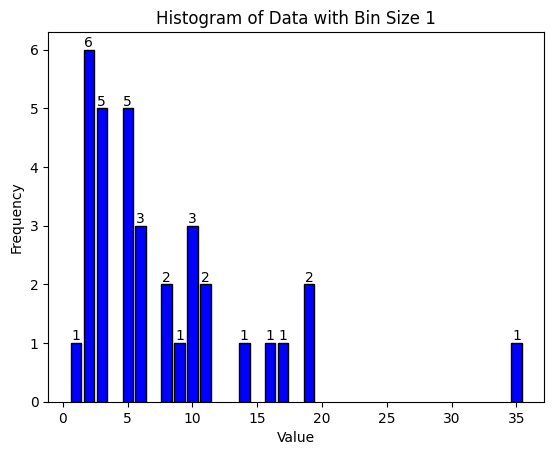

Counter({2: 6,
         3: 5,
         5: 5,
         10: 3,
         6: 3,
         8: 2,
         19: 2,
         11: 2,
         14: 1,
         17: 1,
         35: 1,
         9: 1,
         16: 1,
         1: 1})

In [69]:
import matplotlib.pyplot as plt
import numpy as np

data = []
for i in range(len(df)):
    data.append(len(df['one_hop'][i].split(",")))


import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


# 히스토그램 그리기 (bin size를 1로 설정하고 각 데이터 위에 빈도 표시)
counts = Counter(data)
plt.bar(counts.keys(), counts.values(), color='blue', edgecolor='black')
plt.title('Histogram of Data with Bin Size 1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 각 데이터의 개수 표시
for value, count in counts.items():
    plt.text(value, count, str(count), ha='center', va='bottom')

# 각 데이터별 개수 출력 (엔터로 구분하여 출력)
for value, count in counts.items():
    print(f"'{value}': {count}")


plt.show()

# 각 데이터별 개수 출력
counts


# Total subject

In [ ]:

def get_wikidata_labels(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 해당하는 값들의 영어 레이블을 가져옴)
    query = f"""
    SELECT DISTINCT ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.
      VALUES ?relation {{
        wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
        wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
        wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
        wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
        wdt:P178 wdt:P17
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['valueLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

def main(search_string):
    entity_id = search_string
    if entity_id:
        labels = get_wikidata_labels(entity_id)
        print(f"The English labels for entity ID {entity_id} are: {labels}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return labels

# 예시 사용

for i in range(len(df)):
    ans = main(df.iloc[i]['Subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(2)


# create one-hop for all data

In [20]:
import pandas as pd
df = pd.read_excel('df_full_subid.xlsx')

df['one_hop'] = df['subject_id']

In [21]:
df.head()

,index,subject,subject_id,one_hop
0,0,Danielle Darrieux,Q234149,Q234149
1,1,Edwin of Northumbria,Q348955,Q348955
2,2,Toko Yasuda,Q7813654,Q7813654
3,3,Autonomous University of Madrid,Q788091,Q788091
4,4,Lyon,Q456,Q456


In [23]:

import requests
import time
from tqdm import tqdm

def get_wikidata_labels(entity_id):
    # SPARQL 쿼리 엔드포인트
    url = "https://query.wikidata.org/sparql"

    # SPARQL 쿼리 (입력받은 entity_id에 해당하는 값들의 영어 레이블을 가져옴)
    query = f"""
    SELECT DISTINCT ?valueLabel WHERE {{
      wd:{entity_id} ?relation ?value.
      VALUES ?relation {{
        wdt:P138 wdt:P641 wdt:P37 wdt:P27 wdt:P495 wdt:P19 wdt:P413 wdt:P101
        wdt:P264 wdt:P740 wdt:P39 wdt:P159 wdt:P449 wdt:P364 wdt:P30 wdt:P463
        wdt:P1412 wdt:P140 wdt:P127 wdt:P131 wdt:P108 wdt:P136 wdt:P36 wdt:P176
        wdt:P20 wdt:P276 wdt:P190 wdt:P937 wdt:P103 wdt:P106 wdt:P1303 wdt:P407
        wdt:P178 wdt:P17
      }}
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    
    """

    # 요청 헤더
    headers = {
        "Accept": "application/sparql-results+json"
    }

    # 요청 전송
    response = requests.get(url, headers=headers, params={'query': query})

    # 결과를 JSON으로 변환
    data = response.json()

    # 영어 레이블 반환
    if data['results']['bindings']:
        return [result['valueLabel']['value'] for result in data['results']['bindings']]
    else:
        return []

def main(search_string):
    entity_id = search_string
    if entity_id:
        labels = get_wikidata_labels(entity_id)
        print(f"The English labels for entity ID {entity_id} are: {labels}")
    else:
        print(f"No entity found for search string '{search_string}'.")
    return labels

# 예시 사용

for i in tqdm(range(len(df))):

    ans = main(df.iloc[i]['subject_id'])
    df.loc[i, 'one_hop'] = ','.join(ans)
    time.sleep(2)

    
    

df.to_excel('df_one_hop_full.xlsx', index = False)

  0%|          | 0/21919 [00:00<?, ?it/s]

singer,actor,Bois-le-Roi,film,film actor,France,theatre,stage actor,French,Bordeaux,voice
The English labels for entity ID Q234149 are: ['singer', 'actor', 'Bois-le-Roi', 'film', 'film actor', 'France', 'theatre', 'stage actor', 'French', 'Bordeaux', 'voice']


  0%|          | 1/21919 [00:02<13:53:26,  2.28s/it]

singer,actor,Bois-le-Roi,film,film actor,France,theatre,stage actor,French,Bordeaux,voice
Kingdom of Bernicia,English,King of Northumbria,sovereign,king of Bernicia,Germanic paganism,king of Deira,Chalcedonian Christianity,Hatfield Chase,Kingdom of Deira
The English labels for entity ID Q348955 are: ['Kingdom of Bernicia', 'English', 'King of Northumbria', 'sovereign', 'king of Bernicia', 'Germanic paganism', 'king of Deira', 'Chalcedonian Christianity', 'Hatfield Chase', 'Kingdom of Deira']


  0%|          | 2/21919 [00:04<13:54:25,  2.28s/it]

Kingdom of Bernicia,English,King of Northumbria,sovereign,king of Bernicia,Germanic paganism,king of Deira,Chalcedonian Christianity,Hatfield Chase,Kingdom of Deira
Q7813654
The English labels for entity ID Q7813654 are: ['rock music', 'Blonde Redhead', 'musician', 'bass guitar', 'guitar', 'keyboardist', 'Enon', 'Japan', 'keyboard instrument', 'bass guitarist', 'Touch and Go Records']


  0%|          | 3/21919 [00:06<13:51:53,  2.28s/it]

rock music,Blonde Redhead,musician,bass guitar,guitar,keyboardist,Enon,Japan,keyboard instrument,bass guitarist,Touch and Go Records
Q788091
The English labels for entity ID Q788091 are: ['Coalition for Advancing Research Assessment', 'Conference of Rectors of Spanish Universities', 'European Alliance for Social Sciences and Humanities', 'Spain', 'Madrid', 'Agence universitaire de la Francophonie', 'European University Association', 'YERUN', 'Spanish Association of University Presses', 'Alliance 4 Universities']


  0%|          | 4/21919 [00:09<14:22:10,  2.36s/it]

Coalition for Advancing Research Assessment,Conference of Rectors of Spanish Universities,European Alliance for Social Sciences and Humanities,Spain,Madrid,Agence universitaire de la Francophonie,European University Association,YERUN,Spanish Association of University Presses,Alliance 4 Universities
Q456
The English labels for entity ID Q456 are: ['Metropolis of Lyon', 'Guangzhou', 'Košice', 'Leipzig', 'Birmingham', 'Saint Petersburg', 'Europe', 'Jericho', 'Curitiba', 'France', 'Milan', 'Manila', 'Kyiv', 'Mykolaiv', 'Frankfurt', 'Minsk', 'Aleppo', 'St. Louis', 'Łódź', 'Lugdunum', 'Bălți', 'Beirut', 'Samarkand', 'Yerevan', 'Craiova', 'Pécs', 'Varna', 'Ouagadougou', 'Gothenburg Municipality', 'Yokohama', 'Kutaisi', 'Sétif', 'International Cities of Refuge Network', 'Ho Chi Minh City', 'Beersheba']


  0%|          | 4/21919 [00:12<18:21:30,  3.02s/it]


KeyboardInterrupt: 

# statistics

In [2]:
import pandas as pd

df = pd.read_excel('df_one_hop_full.xlsx')

In [3]:
df.head()

,index,subject,subject_id,one_hop
0,0,Danielle Darrieux,Q234149,"singer,actor,Bois-le-Roi,film,film actor,Franc..."
1,1,Edwin of Northumbria,Q348955,"Kingdom of Bernicia,English,King of Northumbri..."
2,2,Toko Yasuda,Q7813654,"rock music,Blonde Redhead,musician,bass guitar..."
3,3,Autonomous University of Madrid,Q788091,"Coalition for Advancing Research Assessment,Co..."
4,4,Lyon,Q456,"Metropolis of Lyon,Guangzhou,Košice,Leipzig,Bi..."


In [31]:
346/21919

0.01578539166932798

In [29]:
df[df['one_hop'].isna()]

,index,subject,subject_id,one_hop
33,33,Majorette,Q405033,NaN
89,89,Zampa,Q145926,NaN
100,100,Jahangir,Q2554937,NaN
138,138,Decio Azzolino,Q399301,NaN
162,162,Guillaume Durand,Q1218327,NaN
...,...,...,...,...
21668,21668,Siri,Q400975,NaN
21712,21712,CherryPy,Q2635182,NaN
21734,21734,La Commune,Q3207635,NaN
21753,21753,Campegius Vitringa,Q175526,NaN


In [26]:
if not df['one_hop'][33]:
    print("hi")

In [10]:
df['one_hop'][0].split(",")

['singer',
 'actor',
 'Bois-le-Roi',
 'film',
 'film actor',
 'France',
 'theatre',
 'stage actor',
 'French',
 'Bordeaux',
 'voice']

In [16]:
df['one_hop'][30:50]

30    composer,university teacher,Pittsburgh,Catalan...
31                  Canada,indie rock,Paper Bag Records
32    Accademia Nazionale di Santa Cecilia,composed ...
33                                                  NaN
34    Académie royale de peinture et de sculpture,pa...
35                                       Ferrari S.p.A.
36    Eastern Orthodoxy,Brotherhood school of Polots...
37                                              Triumph
38                                                 Jeep
39                            folk rock,Reprise Records
40    Tbilisi,Lublin,Ukrainian,Brno,Ukraine,Nurember...
41    politician,Cairo,diplomat,Egypt,Prime Minister...
42    member of the Lok Sabha,politician,author,jour...
43    Antarctic Treaty area,Antarctica,Arthur D. Howard
44    English,Arab–Israeli conflict,jazz,writer,comp...
45    National Council of the Kingdom of Italy,membe...
46                       painter,Italian,Italy,Florence
47    General councillor of Gard,politician,dipl

In [15]:
for i in range(40):
    if len(df['one_hop'][i].split(",")) == 0:
        print(1)

AttributeError: 'float' object has no attribute 'split'

In [4]:
import matplotlib.pyplot as plt
import numpy as np

data = []
for i in range(len(df)):
    data.append(len(df['one_hop'][i].split(",")))


import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


# 히스토그램 그리기 (bin size를 1로 설정하고 각 데이터 위에 빈도 표시)
counts = Counter(data)
plt.bar(counts.keys(), counts.values(), color='blue', edgecolor='black')
plt.title('Histogram of Data with Bin Size 1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 각 데이터의 개수 표시
for value, count in counts.items():
    plt.text(value, count, str(count), ha='center', va='bottom')

# 각 데이터별 개수 출력 (엔터로 구분하여 출력)
for value, count in counts.items():
    print(f"'{value}': {count}")


plt.show()

# 각 데이터별 개수 출력
counts


AttributeError: 'float' object has no attribute 'split'

# object 수집

## Object original

In [32]:
import json

def load_jsonl_to_list(filepath):
    data_list = []
    with open(filepath, 'r') as file:
        for line in file:
            data_list.append(json.loads(line))
    return data_list

# 사용 예시
filepath = 'counterfact_memit.jsonl'
data = load_jsonl_to_list(filepath)


In [34]:
data[0]['requested_rewrite']

{'prompt': 'The mother tongue of {} is',
 'relation_id': 'P103',
 'target_new': {'str': 'English', 'id': 'Q1860'},
 'target_true': {'str': 'French', 'id': 'Q150'},
 'subject': 'Danielle Darrieux'}

In [35]:

import pandas as pd

obj_id = []
obj = []
index = []

for dt in data:
    rq = dt['requested_rewrite']
    index.append(dt['case_id'])
    obj_id.append(rq['target_true']['id'])
    obj.append(rq['target_true']['str'])

        
        
        
            
df = pd.DataFrame({'index' : index,
                   'obj' : obj,
                   'obj_id' : obj_id
                   })

In [38]:
df.head()

,index,obj,obj_id
0,0,French,Q150
1,1,Christianity,Q5043
2,2,guitar,Q6607
3,3,Spain,Q29
4,4,Beirut,Q3820


In [40]:
df.to_excel('df_full_obj_true.xlsx', index = False)

## Object new

In [1]:
import json

def load_jsonl_to_list(filepath):
    data_list = []
    with open(filepath, 'r') as file:
        for line in file:
            data_list.append(json.loads(line))
    return data_list

# 사용 예시
filepath = 'counterfact_memit.jsonl'
data = load_jsonl_to_list(filepath)


In [3]:
data[0]

{'case_id': 0,
 'pararel_idx': 2796,
 'requested_rewrite': {'prompt': 'The mother tongue of {} is',
  'relation_id': 'P103',
  'target_new': {'str': 'English', 'id': 'Q1860'},
  'target_true': {'str': 'French', 'id': 'Q150'},
  'subject': 'Danielle Darrieux'},
 'paraphrase_prompts': ['Shayna does this and Yossel goes still and dies. Danielle Darrieux, a native',
  'An album was recorded for Capitol Nashville but never released. Danielle Darrieux spoke the language'],
 'neighborhood_prompts': ['The mother tongue of Léon Blum is',
  'The native language of Montesquieu is',
  'François Bayrou, a native',
  'The native language of Raymond Barre is',
  'Michel Rocard is a native speaker of',
  'Jacques Chaban-Delmas is a native speaker of',
  'The native language of François Bayrou is',
  'Maurice Genevoix, speaker of',
  'The mother tongue of François Bayrou is',
  'Melchior de Vogüé, speaker of'],
 'attribute_prompts': ['J.\xa0R.\xa0R. Tolkien is a native speaker of',
  'The mother tongue

In [4]:

import pandas as pd

obj_id = []
obj = []
index = []

for dt in data:
    rq = dt['requested_rewrite']
    index.append(dt['case_id'])
    obj_id.append(rq['target_new']['id'])
    obj.append(rq['target_new']['str'])

        
        
        
            
df = pd.DataFrame({'index' : index,
                   'obj' : obj,
                   'obj_id' : obj_id
                   })

In [5]:
df.head()

,index,obj,obj_id
0,0,English,Q1860
1,1,Islam,Q432
2,2,piano,Q5994
3,3,Sweden,Q34
4,4,Manila,Q1461


In [7]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
df.to_excel('df_full_obj_new.xlsx', index = False)